# History's First Hypothesis Test
Python simulations for a blog article.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

# Time Series Plots

In [14]:
sns.color_palette("hls",24)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5012, 0.33999999999999997),
 (0.86, 0.6312, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.6988, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.43879999999999986, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.86, 0.6312),
 (0.33999999999999997, 0.86, 0.7612000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6988, 0.86),
 (0.33999999999999997, 0.5688000000000001, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5011999999999995, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.7612000000000001, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999),
 (0.86, 0.33999999999999997, 0.6987999999999996),
 (0.86, 0.33999999999999997, 0.5688000000000001),
 (0.86, 0.33999999999999997, 0.43879999999999986)]

In [17]:
# Read data
df = pd.read_csv("arbuthnot.csv")

In [31]:
# Compute sex ratio
df['boys_per_100_girls'] = df['boys']/df['girls']*100

In [32]:
df.head()

,year,boys,girls,boys_per_100_girls
0,1629,5218,4683,111.424301
1,1630,4858,4457,108.997083
2,1631,4422,4102,107.801073
3,1632,4994,4590,108.801743
4,1633,5158,4839,106.592271


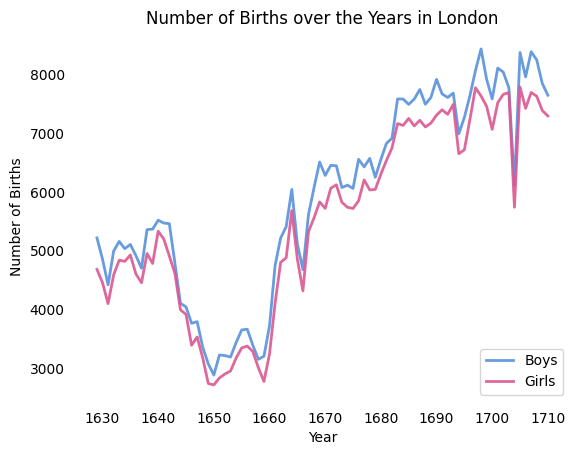

In [74]:
fig, ax = plt.subplots()
ax.plot(df['year'], df['boys'], linewidth=2, color=sns.color_palette("hls",24)[14], alpha=.9)
ax.plot(df['year'], df['girls'], linewidth=2, color=sns.color_palette("hls",24)[22], alpha=.9)
plt.title('Number of Births over the Years in London')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend(labels=['Boys', 'Girls'], loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 

plt.savefig('births-over-years.png')

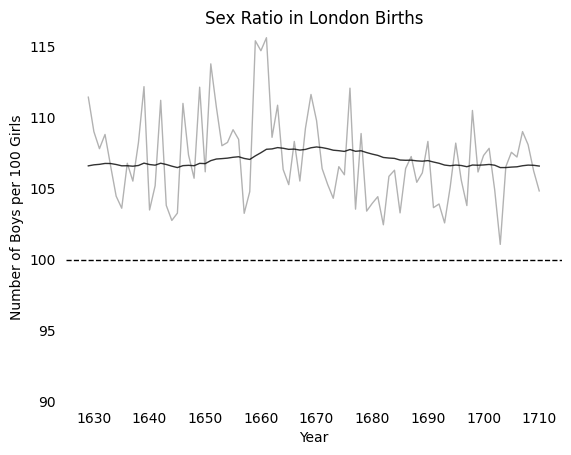

In [76]:
alpha = 0.03  # Smoothing factor (0 < alpha < 1)
moving_avg = [df['boys_per_100_girls'][4]]
for i in range(1, len(df['boys_per_100_girls'])):
    moving_avg.append(alpha * df['boys_per_100_girls'][i] + (1 - alpha) * moving_avg[-1])

fig, ax = plt.subplots()
ax.plot(df['year'], df['boys_per_100_girls'], linewidth=1, color='k', alpha=.3)
ax.plot(df['year'], moving_avg, linewidth=1, color='k', alpha=.8)
plt.axhline(y = 100, color = 'k',  linewidth=1, linestyle = '--')
plt.title('Sex Ratio in London Births')
plt.xlabel('Year')
plt.ylabel('Number of Boys per 100 Girls')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
ax.set_ylim([90,116])

plt.savefig('sex-ratio-over-years.png')

# Fair Coin Flip Simulation

In [3]:
def repeated_coint_toss(num_flips):
    """
    Perform a coin flip num_flips times. 1 is head, 0 is tail.
    """
    return np.random.randint(2, size=num_flips)

In [17]:
num_flips = 82
num_simulations = 5000000

results = []
for simulation in range(num_simulations):
    # Generate random 'num_flips' outcomes
    outcome = repeated_coint_toss(num_flips)
    # Append the number of head
    results.append(np.sum(outcome))

C:\Users\Riccardo\AppData\Local\Temp\ipykernel_13464\2057397246.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results, color='red',
c:\Users\Riccardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Riccardo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN be

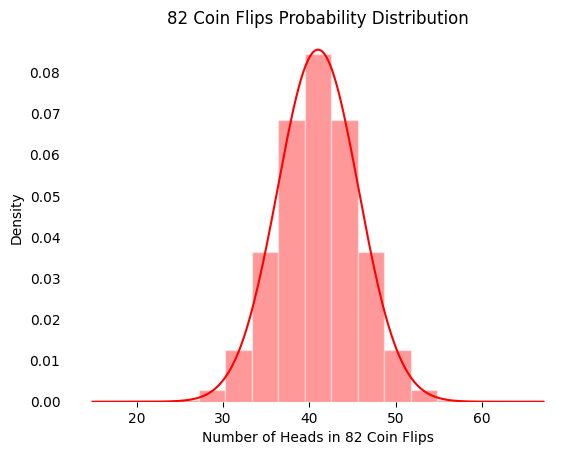

In [20]:
fig, ax = plt.subplots()
sns.distplot(results, color='red',
            hist_kws={'edgecolor':'white'}, 
            bins=15,
            kde_kws={'bw_adjust':5})
plt.title('82 Coin Flips Probability Distribution')
plt.xlabel('Number of Heads in 82 Coin Flips')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') 

plt.savefig('coin-flips.png')

In [45]:
# Estimate mean and standard deviation of coin flip distribution
cf_mean = np.mean(results)
cf_std = np.std(results)
print('Mean: {} \n Std: {}'.format(cf_mean, cf_std))

Mean: 41.0020112 
 Std: 4.528407706365954


In [46]:
dist = sps.norm(loc=cf_mean, scale=cf_std)
x = np.linspace(dist.ppf(.001), dist.ppf(.999))
y = dist.pdf(x)

In [50]:
# Get percentiles of interests
ppfs = {}
for ppf in [0.025, 0.5, 0.975]:
    p = dist.ppf(ppf)
    ppfs[ppf*100] = p

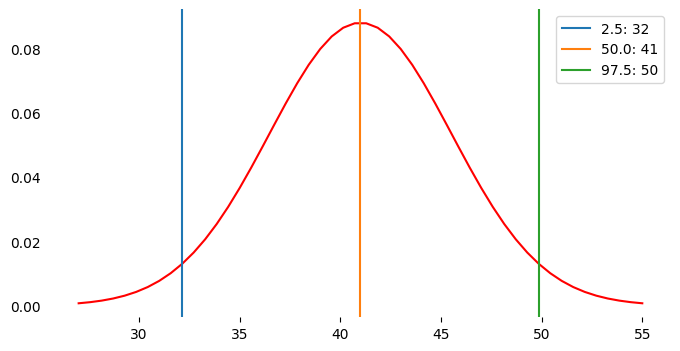

In [63]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, color='red')

for i, ppf in enumerate(ppfs.keys()):
    ax.axvline(ppfs[ppf], color=f'C{i}', label=f'{ppf:.1f}: {ppfs[ppf]:.0f}')
ax.legend()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks_position('none') 
plt.savefig('coin-flips-percentiles.png')

In [62]:
# Define the observed excess of male births and the total number of years
observed_excess = 82  # Replace with your actual observed excess
total_years = 82  # Replace with the total number of years

# Define the expected probability of more boys than girls (under null hypothesis)
expected_probability = 0.5  # Assuming a 50:50 chance

# Calculate the standard error of the proportion
standard_error = np.sqrt((expected_probability * (1 - expected_probability)) / total_years)

# Calculate the z-score, which measures how many standard errors the observed excess is from the expected value
z_score = (observed_excess - (total_years * expected_probability)) / standard_error

# Calculate the two-tailed p-value for the z-score
p_value = 2 * (1 - sps.norm.cdf(np.abs(z_score)))

# Print the results
print(f"Observed Excess: {observed_excess}")
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.20f}")

# Interpret the results
if p_value < 0.05:  # You can adjust the significance level as needed
    print("The observed excess of male births is statistically significant.")
else:
    print("The observed excess of male births is not statistically significant.")

Observed Excess: 82
Z-Score: 742.54
P-Value: 0.00000000000000000000
The observed excess of male births is statistically significant.
